<a href="https://colab.research.google.com/github/Bruno-Moreno/Tesis/blob/main/experiments/mixed_dpp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mixed DPP

In [ ]:
#Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#Sklearn functions
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.model_selection import train_test_split

#Keras functions
import tensorflow as tf
import keras

## Binary Classification

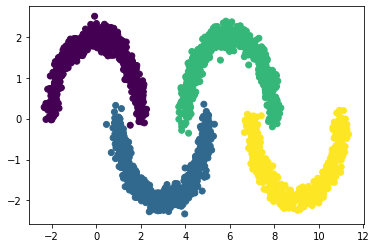

In [ ]:
np.random.seed(666)

def make_many_moons(
    number_of_moons,
    sigma, 
    radius, 
    number_of_datapoints,
    y_shift = 0.3
):
    
    moons = []
    for y in range(number_of_moons):
        q = np.random.uniform(0,np.pi,size=number_of_datapoints)
        
        if y % 2 == 0:
            factor = 1
        else: 
            factor = -1
        
        moon = np.zeros((number_of_datapoints, 3))
        moon[:,0] = (radius * np.cos(q)) + 3*y
        moon[:,1] = (radius * np.sin(q) * factor) + (factor == -1) * y_shift
        moon[:,2] = y
        moons.append(moon)
        noise = np.random.normal(0, sigma, size=moon[:,:2].shape)
        moon[:,:2] += noise
    moons = np.concatenate(moons)

    return moons[:,:2], moons[:,2]


number_of_datapoints = 600

X, y = make_many_moons(
    number_of_moons=4,
    sigma=0.15, 
    radius=2, 
    number_of_datapoints=number_of_datapoints,
    y_shift = 0 )


plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
np.random.seed(666)

def remove_points(X):

  #Remove some points of one of the classes
  train = pd.DataFrame(X)
  train["y"] = y 

  #Removing values 1
  remove_n = int(0.8*number_of_datapoints)
  drop_indices = np.random.choice(train.loc[train.y == 0 , :].index, remove_n, replace=False)
  df_subset = train.drop(drop_indices, axis = 0)

  #Removing values 2
  remove_n = int(0.2*number_of_datapoints)
  drop_indices = np.random.choice(df_subset.loc[df_subset.y == 1 , :].index, remove_n, replace=False)
  df_subset_2 = df_subset.drop(drop_indices, axis = 0)
  print(df_subset_2.y.value_counts())

  df = df_subset_2.copy()

  #Now we make two of the colors the same
  df["y"] = np.where((df_subset_2["y"].values == 0) | (df_subset_2["y"].values == 1), 0, 1)

  fig = plt.scatter(df[0], df[1], c=df["y"])
  plt.legend(handles=fig.legend_elements()[0], labels=["0" , "1"], title="Clase")
  print(df.y.value_counts())

  return df

2.0    600
3.0    600
1.0    480
0.0    120
Name: y, dtype: int64
1    1200
0     600
Name: y, dtype: int64


,0,1,y
2,-0.870870,1.402186,0
9,-0.191063,2.197001,0
10,1.286711,0.954529,0
16,2.144180,0.232238,0
24,-2.051243,0.340942,0
...,...,...,...
2395,10.811768,-0.743692,1
2396,10.272529,-1.447182,1
2397,9.271070,-1.859441,1
2398,10.200049,-1.839066,1


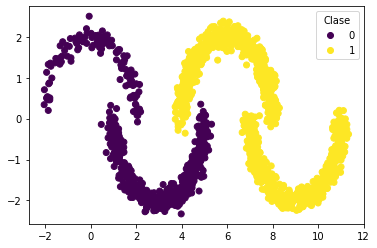

In [ ]:
df = remove_points(X)
df

In [ ]:
X = df.drop(columns = ["y"]).to_numpy()
y = df["y"].to_numpy().ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666 , stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=666 , stratify = y_train)

X_train = X_train.reshape((len(X_train),2,1))
X_val = X_val.reshape((len(X_val),2,1))
X_test = X_test.reshape((len(X_test),2,1))

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
y_val = np.asarray(y_val).astype('float32').reshape((-1,1))

print(f'Train Shape: {X_train.shape}')
print(f'Val Shape: {X_val.shape}')
print(f'Test Shape: {X_test.shape}')

Train Shape: (1152, 2, 1)
Val Shape: (288, 2, 1)
Test Shape: (360, 2, 1)


In [ ]:
!pip install dppy
!pip install umap-learn
!pip install -U pydpp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 KB 2.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=f86222173ac93a6675c71fa221d5f9e04c91843f1b029ad844f26969740177b0
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=bf93b46a70e91126a6e0303c740926ac6dcf97293e7307eb29b324738fab64e4
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/

In [ ]:
# Import usual libraries
import time 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import random

# Import other libaries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Reshape

#Import DPP libraries
from pydpp.dpp import DPP
from sklearn.gaussian_process.kernels import PairwiseKernel

#Functions
from sklearn.metrics import accuracy_score , pairwise_distances
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.model_selection import train_test_split

#Others 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import time 

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

class mini_batch_sampling(tf.keras.utils.Sequence):
  def __init__(self, images, labels, batch_size=128, shuffle=True):
    super().__init__()
    self.images = images
    self.labels = labels
    self.batch_size = batch_size
    self.shuffle = shuffle
    key_array = []
    self.key_array = np.arange(self.images.shape[0], dtype=np.uint32)
    self.on_epoch_end()

  def __len__(self):
    return len(self.key_array)//self.batch_size

  def __getitem__(self, index):
    keys = self.key_array[index*self.batch_size:(index+1)*self.batch_size]

    x = np.asarray(self.images[keys], dtype=np.float32)
    y = np.asarray(self.labels[keys], dtype=np.float32)


    return x, y

  def on_epoch_end(self):
    if self.shuffle:
      self.key_array = np.random.permutation(self.key_array)

In [ ]:
def FFNN(shape):
  model = Sequential()
  model.add(Flatten(input_shape = shape))
  model.add(Dense(1000 , activation = "tanh"))
  model.add(Dense(100 , activation = "relu"))
  model.add(Dense(50 , activation = "tanh"))
  model.add(Dense(1 , activation = "sigmoid"))
  model.summary()

  return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 1000)              3000      
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 108,201
Trainable params: 108,201
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
18/18 [==============================] - 2s 41ms/step - loss: 0.3473 - accuracy: 0.8472 - val_loss: 0.2221 - val_accuracy: 0.9250
Epoch 2/10
18/18 [==============================] - 0s 8ms/step - loss: 0.2089 - accuracy: 0.9297 - val_loss: 0.1650 - val_accuracy: 0.9389
Epoch 3/10
18/18 [==============================] - 0s 10ms/step - loss: 0.1522 - accuracy: 0.9418 - val_loss: 0.1135 - val_accuracy: 0.9556
Epoch 4/10
18/18 [==============================] - 0s 9ms/step - loss: 0.1150 - accuracy: 0.9609 - val_loss: 0.0863 - val_accuracy: 0.9694
Epoch 5/10
18/18 [==============================] - 0s 8ms/step - loss: 0.0945 - accuracy: 0.9627 - val_loss: 0.0762 - val_accuracy: 0.9639
Epoch 6/10
18/18 [==============================] - 0s 10ms/step - loss: 0.0828 - accuracy: 0.9627 - val_loss: 0.0696 - val_accuracy: 0.9667
Epoch 7/10
18/18 [==============================] - 0s 7ms/step - loss: 0.0816 - accuracy: 0.9618 - val_loss: 0.0703 - val_accuracy: 0.9667
Epoch 8/10
18/18 

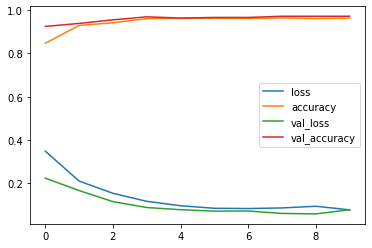

In [ ]:
#Creating the models 
epochs = 10
batch_size = 64
shape = (2,1)

model = FFNN(shape)
#model = FFNN_2(shape)

global model

#Creating the generator
generator_uniform = mini_batch_sampling(images = X_train, labels = y_train , batch_size = batch_size, shuffle = True)

#Compile
model.compile("adam", loss = ['binary_crossentropy'] , metrics = ["accuracy"])
#model.compile("adam", loss = ['categorical_crossentropy'] , metrics = ["accuracy"])

#Fit
time_callback = TimeHistory()
history = model.fit_generator(generator_uniform, epochs=epochs, steps_per_epoch =-1, 
                    validation_data=(X_test, y_test), verbose=1, callbacks = [time_callback])

print(time_callback.times)
pd.DataFrame(history.history).plot()

In [ ]:
class DPP_RBF_Fast(tf.keras.utils.Sequence):
  def __init__(self, images, labels, batch_size=128, N = 100, shuffle=True):
    super().__init__()
    self.images = images
    self.labels = labels
    self.batch_size = batch_size
    self.shuffle = shuffle
    self.N = N
    key_array = []
    self.key_array = np.arange(self.images.shape[0], dtype=np.uint32)
    self.on_epoch_end()

  def __len__(self):
    return len(self.key_array)//self.N

  def __getitem__(self, index):
    #keys = self.key_array[index*self.N:(index+1)*self.N]
    print(f'Key Array Shape: {len(self.key_array)}')

    if len(self.key_array) > self.N:

      random_keys = np.random.choice(self.key_array , self.N , replace = False)

    else:

      random_keys = self.key_array

    tmp_x = self.images[random_keys]
    tmp_y = self.labels[random_keys]

    """DPP = FiniteDPP('likelihood',
                    **{'L_eval_X_data': (self.kernel, tmp_x.reshape( (len(tmp_x) , 2) ) )})
    
    #DPP.sample_mcmc_k_dpp(size=self.batch_size)
    DPP.sample_exact_k_dpp(size=self.batch_size)
    #keys_DPP = DPP.list_of_samples[0][0]
    keys_DPP = DPP.list_of_samples[0]"""

    dpp = DPP(tmp_x.reshape((-1,2)))
    dpp.compute_kernel(kernel_type = 'rbf', sigma= 1)                  
    keys_DPP = dpp.sample_k(self.batch_size) 

    x = np.asarray(tmp_x[keys_DPP], dtype=np.float32)
    y = np.asarray(tmp_y[keys_DPP], dtype=np.float32)

    #self.key_array = np.delete(self.key_array , keys_DPP)
    self.key_array = self.key_array[~np.isin(self.key_array, random_keys)]

    return x, y

  def on_epoch_end(self):
    self.key_array = np.arange(self.images.shape[0], dtype=np.uint32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
 dense_4 (Dense)             (None, 1000)              3000      
                                                                 
 dense_5 (Dense)             (None, 100)               100100    
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 108,201
Trainable params: 108,201
Non-trainable params: 0
_________________________________________________________________
Key Array Shape: 1152


Epoch 1/5
Key Array Shape: 1052
Key Array Shape: 952
      1/Unknown - 1s 1s/step - loss: 0.7259 - accuracy: 0.2969Key Array Shape: 852
      2/Unknown - 1s 144ms/step - loss: 0.6302 - accuracy: 0.4609Key Array Shape: 752
      3/Unknown - 1s 141ms/step - loss: 0.5646 - accuracy: 0.5417Key Array Shape: 652
      4/Unknown - 1s 138ms/step - loss: 0.5351 - accuracy: 0.5781Key Array Shape: 552
      5/Unknown - 2s 138ms/step - loss: 0.5159 - accuracy: 0.6000Key Array Shape: 452
      6/Unknown - 2s 139ms/step - loss: 0.4942 - accuracy: 0.6302Key Array Shape: 352
      7/Unknown - 2s 141ms/step - loss: 0.4770 - accuracy: 0.6585Key Array Shape: 252
      8/Unknown - 2s 141ms/step - loss: 0.4638 - accuracy: 0.6855Key Array Shape: 152
10/10 [==============================] - 3s 178ms/step - loss: 0.4445 - accuracy: 0.7219 - val_loss: 0.2690 - val_accuracy: 0.9250
Epoch 2/5
Key Array Shape: 1152
Key Array Shape: 1052
10/10 [==============================] - 1s 149ms/step - loss: 0.2742 - accur

Epoch 1/5
18/18 [==============================] - 0s 19ms/step - loss: 0.1093 - accuracy: 0.9618 - val_loss: 0.0859 - val_accuracy: 0.9583
Epoch 2/5
18/18 [==============================] - 0s 16ms/step - loss: 0.0881 - accuracy: 0.9644 - val_loss: 0.0768 - val_accuracy: 0.9722
Epoch 3/5
18/18 [==============================] - 0s 19ms/step - loss: 0.0811 - accuracy: 0.9635 - val_loss: 0.0642 - val_accuracy: 0.9750
Epoch 4/5
18/18 [==============================] - 0s 16ms/step - loss: 0.0741 - accuracy: 0.9679 - val_loss: 0.0577 - val_accuracy: 0.9750
Epoch 5/5
18/18 [==============================] - 0s 15ms/step - loss: 0.0755 - accuracy: 0.9679 - val_loss: 0.0638 - val_accuracy: 0.9750


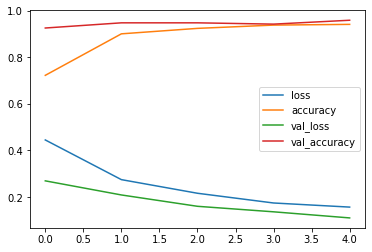

In [ ]:
#Creating the models 
epochs = 10
batch_size = 64
shape = (2,1)

epochs_l = 5

model = FFNN(shape)
global model

#Creating the generator
generator_uniform = mini_batch_sampling(images = X_train, labels = y_train , batch_size = batch_size, shuffle = True)
generator_DPP = DPP_RBF_Fast(images = X_train, labels=y_train, 
                        batch_size=batch_size, N = 100, shuffle=False)

#Compile
model.compile("adam", loss = ['binary_crossentropy'] , metrics = ["accuracy"])

#Fit
time_callback = TimeHistory()

history = model.fit_generator(generator_DPP, epochs = epochs_l, steps_per_epoch =-1, 
                              validation_data=(X_test, y_test), verbose=1, callbacks = [time_callback])

history_2 = model.fit_generator(generator_uniform, epochs = epochs - epochs_l, steps_per_epoch =-1, 
                    validation_data=(X_test, y_test), verbose=1, callbacks = [time_callback])

#print(time_callback.times)
pd.DataFrame(history.history).plot()

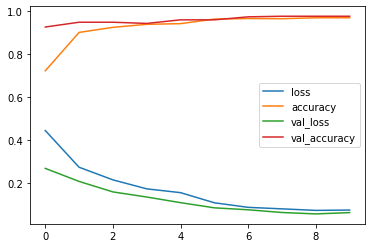

In [ ]:
df_1 = pd.DataFrame(history.history)
df_2 = pd.DataFrame(history_2.history)
df = pd.concat([df_1,df_2], axis = 0).reset_index(drop = True)
df.plot()

In [ ]:
time_callback.times + time_callback.times

[0.35157132148742676,
 0.30736207962036133,
 0.3544149398803711,
 0.32228660583496094,
 0.3236353397369385,
 0.35157132148742676,
 0.30736207962036133,
 0.3544149398803711,
 0.32228660583496094,
 0.3236353397369385]

## Train

In [ ]:
from IPython.display import display, clear_output

def cum_sum(time_list):
  cumtime = time_list[0]
  cumsum = [cumtime]
  for time in time_list[1:]:
    cumtime += time
    cumsum.append(cumtime)

  return cumsum

def plot_confidence(n):

  #Creating the models 
  epochs = 50
  batch_size = 64
  shape = (2,1)
  historial = pd.DataFrame()
  

  for i in range(n):
    
    print(f'Iteration: {i}')

    #####################
    #Baseline
    #####################

    model = FFNN(shape)

    #Creating the generator
    generator_uniform = mini_batch_sampling(images = X_train, labels = y_train , 
                                            batch_size = batch_size, shuffle = True)

    #Compile
    model.compile("adam", loss = ['binary_crossentropy'] , metrics = ["accuracy"])

    #Fit
    time_callback = TimeHistory()

    history = model.fit_generator(generator_uniform, epochs=epochs, steps_per_epoch =-1, 
                        validation_data=(X_test, y_test), verbose=1, callbacks = [time_callback])
    
    history = pd.DataFrame(history.history)
    
    loss = history[["loss"]]
    loss["val_loss"] = history[["val_loss"]]
    loss["val_accuracy"] = history[["val_accuracy"]]
    loss["time"] =  np.array(time_callback.times).cumsum()
    loss["epoch"] = list(range(1,epochs+1))
    loss["method"] = "baseline"
    #loss["time"] = cum_sum(time_list)
    historial = pd.concat([historial , loss], axis = 0)

    clear_output(wait=True)

    #####################
    #Fast DPP
    #####################

    model = FFNN(shape)

    #Creating the generator
    generator_DPP = DPP_RBF_Fast(images = X_train, labels=y_train, 
                            batch_size=batch_size, N = 100, shuffle=False)

    #Compile
    model.compile("adam", loss = ['binary_crossentropy'] , metrics = ["accuracy"])

    #Fit
    time_callback = TimeHistory()

    history_DPP = model.fit_generator(generator_DPP, epochs=epochs, steps_per_epoch =-1, 
                                  validation_data=(X_test, y_test), verbose=1, callbacks = [time_callback])

    history_DPP = pd.DataFrame(history_DPP.history)

    loss = history_DPP[["loss"]]
    loss["val_loss"] = history_DPP[["val_loss"]]
    loss["val_accuracy"] = history_DPP[["val_accuracy"]]
    loss["epoch"] = list(range(1, epochs+1))
    loss["time"] =  np.array(time_callback.times).cumsum()
    loss["method"] = "Fast DPP"
    #loss["time"] = cum_sum(time_list_DPP)
    historial = pd.concat([historial , loss], axis = 0)

    clear_output(wait=True)


    #####################
    #Mixed DPP
    #####################
    epochs_l = 5

    model = FFNN(shape)

    #Creating the generator
    generator_uniform = mini_batch_sampling(images = X_train, labels = y_train , batch_size = batch_size, shuffle = True)
    generator_DPP = DPP_RBF_Fast(images = X_train, labels=y_train, 
                            batch_size=batch_size, N = 100, shuffle=False)

    #Compile
    model.compile("adam", loss = ['binary_crossentropy'] , metrics = ["accuracy"])

    #Fit
    time_callback_1 = TimeHistory()
    time_callback_2 = TimeHistory()

    history_DPP = model.fit_generator(generator_DPP, epochs = epochs_l, steps_per_epoch =-1, 
                                  validation_data=(X_test, y_test), verbose=1, callbacks = [time_callback_1])

    history_uniform = model.fit_generator(generator_uniform, epochs = epochs - epochs_l, steps_per_epoch =-1, 
                        validation_data=(X_test, y_test), verbose=1, callbacks = [time_callback_2])
    
    times = time_callback_1.times + time_callback_2.times
    
    df_1 = pd.DataFrame(history_DPP.history)
    df_2 = pd.DataFrame(history_uniform.history)
    history = pd.concat([df_1,df_2], axis = 0).reset_index(drop = True)

    loss = history[["loss"]]
    loss["val_loss"] = history[["val_loss"]]
    loss["val_accuracy"] = history[["val_accuracy"]]
    loss["epoch"] = list(range(1, epochs+1))
    loss["time"] =  np.array(times).cumsum()
    loss["method"] = "Mixed DPP"
    #loss["time"] = cum_sum(time_list_DPP)
    historial = pd.concat([historial , loss], axis = 0)

    clear_output(wait=True)

    #####################
    #Reversed Mixed DPP
    #####################
    epochs_l = 5

    model = FFNN(shape)

    #Creating the generator
    generator_uniform = mini_batch_sampling(images = X_train, labels = y_train , batch_size = batch_size, shuffle = True)
    generator_DPP = DPP_RBF_Fast(images = X_train, labels=y_train, 
                            batch_size=batch_size, N = 100, shuffle=False)

    #Compile
    model.compile("adam", loss = ['binary_crossentropy'] , metrics = ["accuracy"])

    #Fit
    time_callback_1 = TimeHistory()
    time_callback_2 = TimeHistory()

    history_uniform = model.fit_generator(generator_uniform, epochs = epochs - epochs_l, steps_per_epoch =-1, 
                        validation_data=(X_test, y_test), verbose=1, callbacks = [time_callback_1])

    history_DPP = model.fit_generator(generator_DPP, epochs = epochs_l, steps_per_epoch =-1, 
                                  validation_data=(X_test, y_test), verbose=1, callbacks = [time_callback_2])
    
    times = time_callback_1.times + time_callback_2.times
    
    df_1 = pd.DataFrame(history_uniform.history)
    df_2 = pd.DataFrame(history_DPP.history)

    history = pd.concat([df_1 , df_2], axis = 0).reset_index(drop = True)

    loss = history[["loss"]]
    loss["val_loss"] = history[["val_loss"]]
    loss["val_accuracy"] = history[["val_accuracy"]]
    loss["epoch"] = list(range(1, epochs+1))
    loss["time"] =  np.array(times).cumsum()
    loss["method"] = "Reversed Mixed DPP"
    #loss["time"] = cum_sum(time_list_DPP)
    historial = pd.concat([historial , loss], axis = 0)

    clear_output(wait=True)


  historial.reset_index(drop = True , inplace = True)


  return historial

train_historial = plot_confidence(n = 10)
train_historial

,loss,val_loss,val_accuracy,time,epoch,method
0,0.366894,0.258338,0.886111,2.040552,1,baseline
1,0.201124,0.152255,0.947222,2.309704,2,baseline
2,0.165158,0.136904,0.961111,2.678701,3,baseline
3,0.131934,0.105873,0.958333,2.987395,4,baseline
4,0.103194,0.086443,0.955556,3.310637,5,baseline
...,...,...,...,...,...,...
1995,0.005034,0.001232,1.000000,11.323336,46,Reversed Mixed DPP
1996,0.002605,0.001031,1.000000,12.763602,47,Reversed Mixed DPP
1997,0.003079,0.001507,1.000000,14.220053,48,Reversed Mixed DPP
1998,0.002311,0.001005,1.000000,15.544344,49,Reversed Mixed DPP


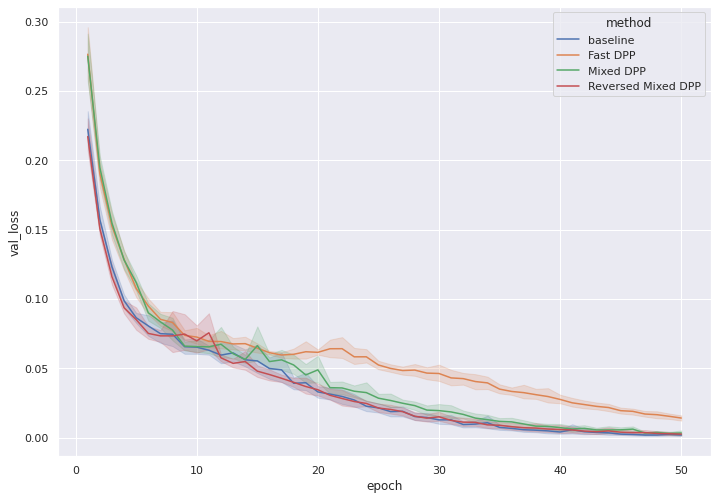

In [ ]:
import seaborn as sns 

#Plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="epoch", y= "val_loss", hue = "method", data = train_historial)

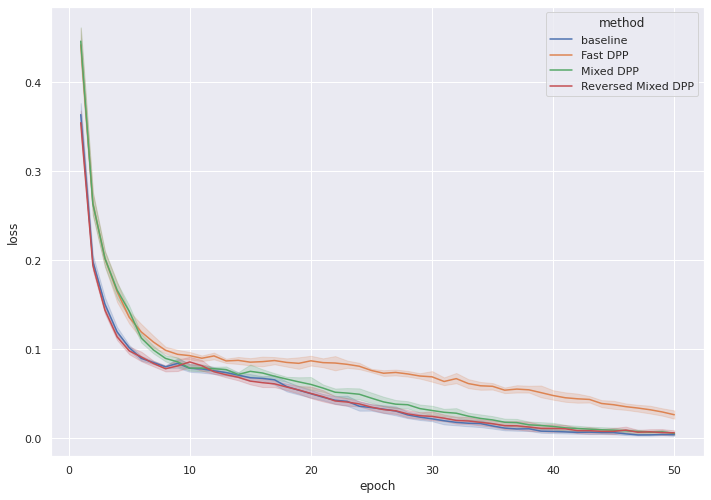

In [ ]:
#Plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="epoch", y= "loss", hue = "method", data = train_historial)

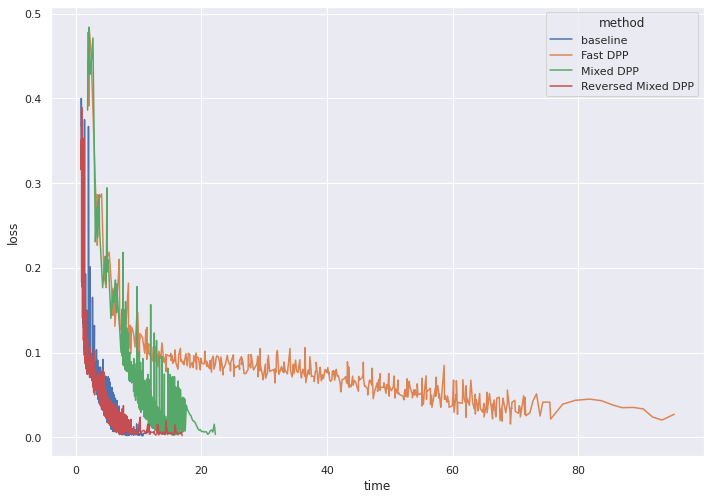

In [ ]:
#Plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="time", y= "loss", hue = "method",  data = train_historial)

## Multiclass Classification

In [ ]:
!pip install dppy
!pip install umap-learn
!pip install -U pydpp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 KB 2.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=8c91ebc3358ee63bd79792d62138ee050770db409a4282dadf8d53b083116d4c
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=fbad0a132ee8fba6b1e652e99b64806b2259a8ff0b84b66096cd090f3006acdd
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/

In [ ]:
# Import usual libraries
import time 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import random

# Import other libaries
import tensorflow as tf
import keras
from keras.models import Sequential , Model
from keras import backend as K
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Reshape
from keras.layers import Lambda
from keras.layers import BatchNormalization


#Import DPP libraries
from pydpp.dpp import DPP
from sklearn.gaussian_process.kernels import PairwiseKernel

#Functions
from sklearn.metrics import accuracy_score , pairwise_distances
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.model_selection import train_test_split

#Others 
import warnings
warnings.filterwarnings("ignore")


In [ ]:
def dataset(name):
  if name == "FASHION_MNIST":

    fashion_mnist = keras.datasets.fashion_mnist
    (X_train_full,y_train_full) , (X_test , y_test) = fashion_mnist.load_data()

    X_val , X_train =  X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
    y_val , y_train =  y_train_full[:5000]  , y_train_full[5000:] 

    print(f'Train Shape: {X_train.shape}')
    print(f'Val Shape: {X_val.shape}')
    print(f'Test Shape: {X_test.shape}')

    return X_train , y_train , X_val, y_val , X_test , y_test

  elif name == "MNIST":

    mnist = keras.datasets.mnist
    (X_train_full,y_train_full) , (X_test , y_test) = mnist.load_data()

    X_val , X_train =  X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
    y_val , y_train =  y_train_full[:5000]  , y_train_full[5000:] 

    print(f'Train Shape: {X_train.shape}')
    print(f'Val Shape: {X_val.shape}')
    print(f'Test Shape: {X_test.shape}')

    return X_train , y_train , X_val, y_val , X_test , y_test

  else: 
    print("Error")

X_train , y_train , X_val, y_val , X_test , y_test = dataset("FASHION_MNIST")

4422102/4422102 [==============================] - 0s 0us/step
Train Shape: (55000, 28, 28)
Val Shape: (5000, 28, 28)
Test Shape: (10000, 28, 28)


In [ ]:
def get_samples_train(X, y , clase):
  data = pd.DataFrame(X.reshape((len(X), 28*28)))
  data["y"] = y
  if clase < 4:
    samples = data.loc[data.y == clase, :].sample(2500, random_state = 666)
  elif clase < 7:
    samples = data.loc[data.y == clase, :].sample(1500, random_state = 666)
  else:
    samples = data.loc[data.y == clase, :].sample(500, random_state = 666)

  return list(samples.index)

In [ ]:
samples_list = []
for i in range(10):
  samples_list += get_samples_train(X_train, y_train, i)
  
train = pd.DataFrame(X_train.reshape((len(X_train), 28*28)))
train_modified = train.loc[samples_list, :]
train_modified

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
3108,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.533333,0.517647,0.654902,0.000000,0.00000,0.007843,0.000000,0.000000,0.000000,0.0
13300,0.0,0.0,0.0,0.000000,0.0,0.003922,0.0,0.0,0.0,0.000000,...,0.352941,0.313725,0.372549,0.000000,0.00000,0.007843,0.000000,0.000000,0.000000,0.0
42129,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.364706,...,0.447059,0.533333,0.603922,0.329412,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
47737,0.0,0.0,0.0,0.007843,0.0,0.000000,0.0,0.0,0.0,0.070588,...,0.796078,0.815686,0.505882,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
47188,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.027451,...,0.070588,0.023529,0.070588,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
2998,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
42961,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
18168,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.003922,...,0.000000,0.003922,0.000000,0.458824,0.72549,0.662745,0.607843,0.584314,0.164706,0.0


In [ ]:
X_train = train_modified.to_numpy().reshape((-1,28,28))
y_train = y_train[samples_list]
X_train.shape

(16000, 28, 28)

In [ ]:
def get_samples_val(X, y , clase):
  data = pd.DataFrame(X.reshape((len(X), 28*28)))
  data["y"] = y
  if clase < 4:
    samples = data.loc[data.y == clase, :].sample(250, random_state = 666)
  elif clase < 7:
    samples = data.loc[data.y == clase, :].sample(150, random_state = 666)
  else:
    samples = data.loc[data.y == clase, :].sample(50, random_state = 666)

  return list(samples.index)

lista = get_samples_val(X_val, y_val, 8)

In [ ]:
samples_list = []
for i in range(10):
  samples_list += get_samples_val(X_val, y_val, i)
  
val = pd.DataFrame(X_val.reshape((len(X_val), 28*28)))
val_modified = val.loc[samples_list, :]
val_modified

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
3050,0.0,0.0,0.0,0.0,0.000000,0.0,0.003922,0.0,0.000000,0.000000,...,0.709804,0.725490,0.800000,0.227451,0.000000,0.007843,0.000000,0.000000,0.0,0.0
4407,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.156863,0.129412,0.066667,0.011765,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2307,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.466667,...,0.364706,0.337255,0.258824,0.109804,0.000000,0.000000,0.000000,0.000000,0.0,0.0
791,0.0,0.0,0.0,0.0,0.000000,0.0,0.003922,0.0,0.019608,0.207843,...,0.615686,0.603922,0.313725,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3865,0.0,0.0,0.0,0.0,0.003922,0.0,0.000000,0.0,0.000000,0.160784,...,0.643137,0.694118,0.639216,0.000000,0.000000,0.003922,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4490,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4827,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3096,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.027451,0.592157,0.517647,0.462745,0.447059,0.458824,0.192157,0.0,0.0
932,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [ ]:
X_val = val_modified.to_numpy().reshape((-1,28,28))
y_val = y_val[samples_list]
X_val.shape

(1600, 28, 28)

### Autoencoder

In [ ]:
def encoder_model(latent_size):
  encoder = Sequential()

  #Encoder
  encoder.add(Flatten(input_shape = [28 , 28]))
  encoder.add(Dense(500, activation = "sigmoid"))
  encoder.add(Dense(300, activation = "sigmoid"))
  encoder.add(Dense(100, activation = "sigmoid"))
  encoder.add(Dense(latent_size, activation = "tanh"))

  #Decoder 
  print(encoder.summary())
  return encoder 

def decoder_model(latent_size):
  decoder = Sequential()

  #Decoder 
  decoder.add(Dense(100, input_shape = (latent_size , ) , activation = "sigmoid"))
  decoder.add(Dense(300, activation = "sigmoid"))
  decoder.add(Dense(500, activation = "sigmoid"))
  decoder.add(Dense(784, activation = "sigmoid"))
  decoder.add(Reshape(target_shape = (28,28)))
  
  return decoder 

In [ ]:
#Creating the models 
latent_size = 32
encoder = encoder_model(latent_size)
decoder = decoder_model(latent_size)

#Joining the models 
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("adam", loss = "binary_crossentropy")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 32)                3232      
                                                                 
Total params: 576,132
Trainable params: 576,132
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/50
125/125 [==============================] - 15s 100ms/step - loss: 0.4835 - val_loss: 24.2875
Epoch 2/50
125/125 [==============================] - 12s 98ms/step - loss: 0.4700 - val_loss: -5.3890
Epoch 3/50
125/125 [==============================] - 9s 73ms/step - loss: 0.4090 - val_loss: -54.7533
Epoch 4/50
125/125 [==============================] - 6s 44ms/step - loss: 0.3909 - val_loss: -57.2319
Epoch 5/50
125/125 [==============================] - 6s 44ms/step - loss: 0.3840 - val_loss: -53.6780
Epoch 6/50
125/125 [==============================] - 6s 45ms/step - loss: 0.3755 - val_loss: -45.2864
Epoch 7/50
125/125 [==============================] - 5s 44ms/step - loss: 0.3650 - val_loss: -73.8867
Epoch 8/50
125/125 [==============================] - 6s 45ms/step - loss: 0.3465 - val_loss: -93.2646
Epoch 9/50
125/125 [==============================] - 7s 52ms/step - loss: 0.3398 - val_loss: -98.8213
Epoch 10/50
125/125 [==============================] - 5s 43ms/step - lo

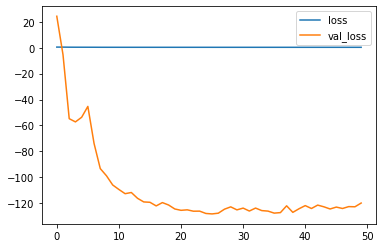

In [ ]:
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
        
time_callback = TimeHistory()
history = model.fit(X_train , X_train , batch_size = 128 , epochs = 50, validation_data= (X_test, X_test), callbacks = [time_callback])
pd.DataFrame(history.history).plot()

In [ ]:
train_historial = pd.DataFrame(history.history)
train_historial["time"] = np.array(time_callback.times).cumsum()
train_historial

,loss,val_loss,time
0,0.483526,24.287510,14.630058
1,0.469997,-5.389046,26.855850
2,0.409032,-54.753281,36.012854
3,0.390907,-57.231876,41.526097
4,0.383969,-53.678001,47.070754
5,0.375530,-45.286427,52.746863
6,0.365047,-73.886734,58.246673
7,0.346480,-93.264610,63.822924
8,0.339763,-98.821251,70.339853
9,0.336378,-105.906876,75.737782


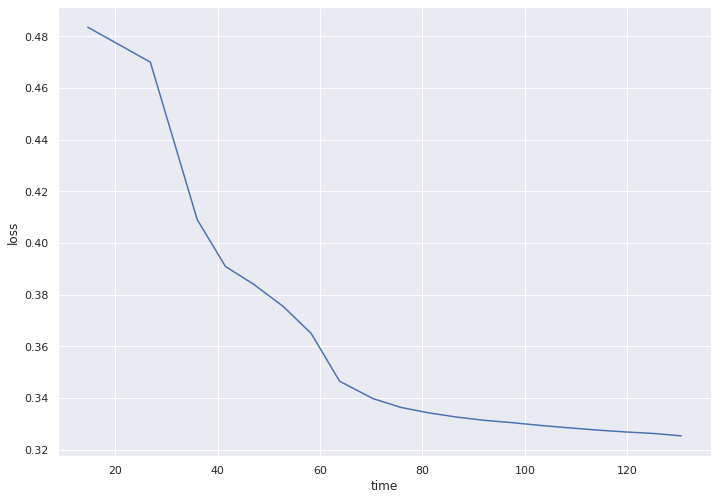

In [ ]:
import seaborn as sns 
#Plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x ="time", y= "loss", data = train_historial.iloc[:20, :])

### Oneshot

In [ ]:
num_classes = 10
epochs = 10

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    sqaure_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * sqaure_pred + (1 - y_true) * margin_square)


def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(num_classes)]) - 1
    for d in range(num_classes):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, num_classes)
            dn = (d + inc) % num_classes
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1.0, 0.0]
    return np.array(pairs), np.array(labels)


def create_base_network(input_shape):
    '''Base network to be shared (eq. to feature extraction).
    '''
    input = Input(shape=input_shape)
    x = Flatten()(input)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    #x = Dense(128, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    x = Lambda(lambda  x: K.l2_normalize(x,axis=1))(x)
    x = Lambda(lambda  x: K.l2_normalize(x,axis=1))(x)
    return Model(input, x)


def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)


def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# create training+test positive and negative pairs
digit_indices = [np.where(y_train == i)[0] for i in range(num_classes)]

tr_pairs, tr_y = create_pairs(X_train, digit_indices)
digit_indices = [np.where(y_test == i)[0] for i in range(num_classes)]
te_pairs, te_y = create_pairs(X_test, digit_indices)

Epoch 1/10
78/78 [==============================] - 7s 23ms/step - loss: 0.1340 - accuracy: 0.8176 - val_loss: 0.1095 - val_accuracy: 0.8495
Epoch 2/10
78/78 [==============================] - 1s 19ms/step - loss: 0.1020 - accuracy: 0.8711 - val_loss: 0.0987 - val_accuracy: 0.8643
Epoch 3/10
78/78 [==============================] - 3s 37ms/step - loss: 0.0900 - accuracy: 0.8872 - val_loss: 0.0943 - val_accuracy: 0.8729
Epoch 4/10
78/78 [==============================] - 3s 35ms/step - loss: 0.0837 - accuracy: 0.8953 - val_loss: 0.0943 - val_accuracy: 0.8747
Epoch 5/10
78/78 [==============================] - 1s 19ms/step - loss: 0.0778 - accuracy: 0.9050 - val_loss: 0.0894 - val_accuracy: 0.8807
Epoch 6/10
78/78 [==============================] - 1s 19ms/step - loss: 0.0721 - accuracy: 0.9126 - val_loss: 0.0929 - val_accuracy: 0.8752
Epoch 7/10
78/78 [==============================] - 1s 19ms/step - loss: 0.0686 - accuracy: 0.9194 - val_loss: 0.0855 - val_accuracy: 0.8896
Epoch 8/10
78

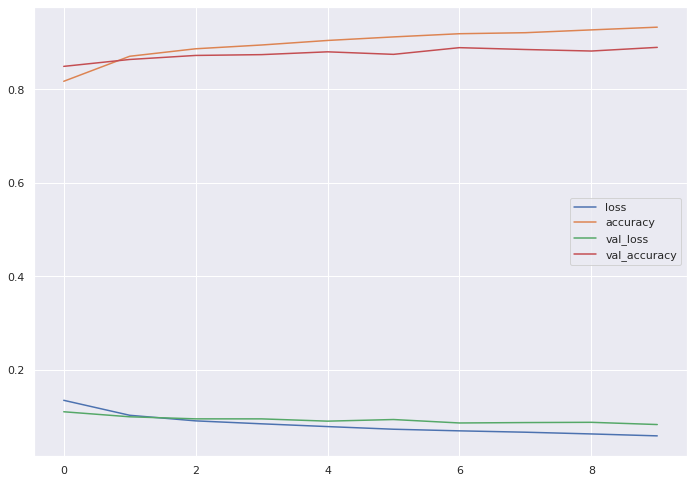

In [ ]:
input_shape = X_train.shape[1:]

# network definition
base_network = create_base_network(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

# because we re-use the same instance `base_network`,
# the weights of the network
# will be shared across the two branches
processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(euclidean_distance,
                  output_shape=eucl_dist_output_shape)([processed_a, processed_b])

model = Model([input_a, input_b], distance)

model.compile(loss=contrastive_loss, optimizer="rmsprop", metrics=[accuracy])
# train
time_callback = TimeHistory()

history = model.fit([tr_pairs[:, 0], tr_pairs[:, 1]], tr_y,
          batch_size=128,
          epochs=epochs,
          callbacks = [time_callback],
          validation_data=([te_pairs[:, 0], te_pairs[:, 1]], te_y))

pd.DataFrame(history.history).plot()

In [ ]:
train_historial = pd.DataFrame(history.history)
train_historial["time"] = np.array(time_callback.times).cumsum()
train_historial

,loss,accuracy,val_loss,val_accuracy,time
0,0.134042,0.817553,0.109508,0.849506,6.687055
1,0.101976,0.871145,0.098737,0.864285,8.151261
2,0.089994,0.887200,0.094325,0.872927,11.006595
3,0.083690,0.895303,0.094258,0.874652,13.702622
4,0.077761,0.905013,0.089391,0.880673,15.172771
5,0.072088,0.912621,0.092871,0.875249,16.656438
6,0.068623,0.919449,0.085491,0.889580,18.103127
7,0.065706,0.921646,0.086373,0.885649,19.556691
8,0.061993,0.927665,0.086905,0.882365,20.987584
9,0.057868,0.933474,0.082132,0.890227,22.424445


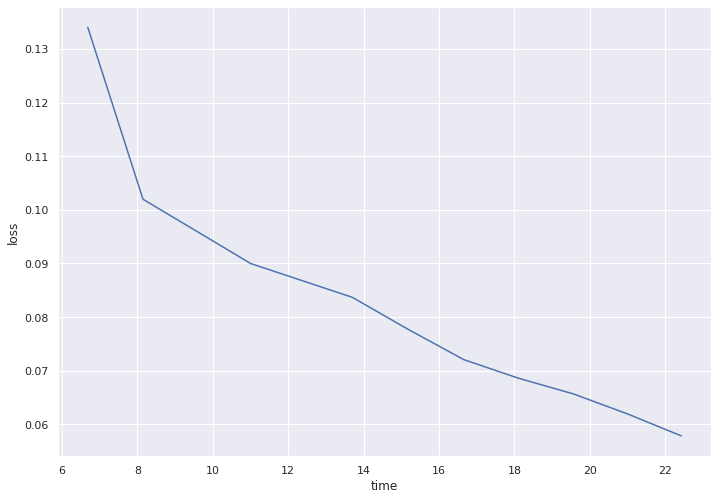

In [ ]:
#Plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x ="time", y= "loss", data = train_historial)

In [ ]:
# compute final accuracy on training and test sets
y_pred_tr = model.predict([tr_pairs[:, 0], tr_pairs[:, 1]])
tr_acc = compute_accuracy(tr_y, y_pred_tr)
y_pred_te = model.predict([te_pairs[:, 0], te_pairs[:, 1]])
te_acc = compute_accuracy(te_y, y_pred_te)

print('* Accuracy on training set: %0.2f%%' % (100 * tr_acc))
print('* Accuracy on test set: %0.2f%%' % (100 * te_acc))

625/625 [==============================] - 2s 3ms/step
* Accuracy on training set: 94.03%
* Accuracy on test set: 88.96%


### Train

In [ ]:
def CNN_deep_1(shape):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  #model.summary()

  return model 

def CNN_deep(shape):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding= "same", activation='relu', input_shape = shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  model.add(Conv2D(64, padding='same',  kernel_size=(3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.summary()

  return model 

In [ ]:
import time 

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

class mini_batch_sampling(tf.keras.utils.Sequence):
  def __init__(self, images, labels, batch_size=128, shuffle=True):
    super().__init__()
    self.images = images
    self.labels = labels
    self.batch_size = batch_size
    self.shuffle = shuffle
    key_array = []
    self.key_array = np.arange(self.images.shape[0], dtype=np.uint32)
    self.on_epoch_end()

  def __len__(self):
    return len(self.key_array)//self.batch_size

  def __getitem__(self, index):
    keys = self.key_array[index*self.batch_size:(index+1)*self.batch_size]

    x = np.asarray(self.images[keys], dtype=np.float32)
    y = np.asarray(self.labels[keys], dtype=np.float32)


    return x, y

  def on_epoch_end(self):
    if self.shuffle:
      self.key_array = np.random.permutation(self.key_array)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

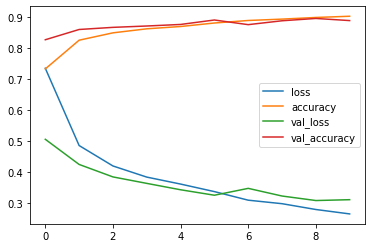

In [ ]:
#Creating the models 
epochs = 10
batch_size = 64
shape = (28,28,1)

model = CNN_deep(shape)

global model

#Creating the generator
generator_uniform = mini_batch_sampling(images = X_train, labels = y_train , batch_size = batch_size, shuffle = True)


#Compile
model.compile("adam", loss = ['sparse_categorical_crossentropy'] , metrics = ["accuracy"])

#Fit
time_callback = TimeHistory()
history = model.fit_generator(generator_uniform, epochs=epochs, 
                    validation_data = (X_val, y_val), verbose=1, callbacks = [time_callback])

print(time_callback.times)
pd.DataFrame(history.history).plot()

In [ ]:
class DPP_RBF_Fast_Autoencoder(tf.keras.utils.Sequence):
  def __init__(self, images, labels, batch_size=128, N = 100, shuffle=True):
    super().__init__()
    self.images = images
    self.labels = labels
    self.batch_size = batch_size
    self.shuffle = shuffle
    self.N = N
    key_array = []
    self.key_array = np.arange(self.images.shape[0], dtype=np.uint32)
    self.on_epoch_end()
    self.embedded_image = encoder.predict(images)

  def __len__(self):
    return len(self.key_array) // self.N

  def __getitem__(self, index):
    #keys = self.key_array[index*self.N:(index+1)*self.N]
    print(f'Key Array Shape: {len(self.key_array)}')

    if len(self.key_array) > self.N:

      random_keys = np.random.choice(self.key_array , self.N , replace = False)

    else:

      random_keys = self.key_array

    tmp_x = self.images[random_keys]
    tmp_y = self.labels[random_keys]

    tmp_x_embedded = self.embedded_image[random_keys]

    """DPP = FiniteDPP('likelihood',
                    **{'L_eval_X_data': (self.kernel, tmp_x.reshape( (len(tmp_x) , 2) ) )})
    
    #DPP.sample_mcmc_k_dpp(size=self.batch_size)
    DPP.sample_exact_k_dpp(size=self.batch_size)
    #keys_DPP = DPP.list_of_samples[0][0]
    keys_DPP = DPP.list_of_samples[0]"""

    dpp = DPP(tmp_x_embedded)
    dpp.compute_kernel(kernel_type = 'rbf', sigma= 10)                  
    keys_DPP = dpp.sample_k(self.batch_size) 

    x = np.asarray(tmp_x[keys_DPP], dtype=np.float32)
    y = np.asarray(tmp_y[keys_DPP], dtype=np.float32)

    #self.key_array = np.delete(self.key_array , keys_DPP)
    self.key_array = self.key_array[~np.isin(self.key_array, random_keys)]

    return x, y

  def on_epoch_end(self):
    self.key_array = np.arange(self.images.shape[0], dtype=np.uint32)

In [ ]:
#Creating the models 
epochs = 10
batch_size = 64
shape = (28,28,1)

model = CNN_deep(shape)
global model

#Creating the generator
generator_DPP = DPP_RBF_Fast_Autoencoder(images = X_train, labels=y_train, 
                        batch_size=batch_size, N = 300, shuffle=False)


#Compile
model.compile("adam", loss = ['sparse_categorical_crossentropy'] , metrics = ["accuracy"])

#Fit
time_callback = TimeHistory()

history = model.fit_generator(generator_DPP, epochs=epochs, steps_per_epoch =-1, 
                              validation_data=(X_val, y_val), verbose=1, callbacks = [time_callback])

#print(time_callback.times)
pd.DataFrame(history.history).plot()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)             

Epoch 1/10
Key Array Shape: 15700
Key Array Shape: 15400
      1/Unknown - 1s 916ms/step - loss: 2.3294 - accuracy: 0.1250Key Array Shape: 15100
      2/Unknown - 1s 336ms/step - loss: 2.2407 - accuracy: 0.1172Key Array Shape: 14800
      3/Unknown - 2s 327ms/step - loss: 2.1487 - accuracy: 0.1719Key Array Shape: 14500
      4/Unknown - 2s 319ms/step - loss: 2.1173 - accuracy: 0.1836Key Array Shape: 14200
      5/Unknown - 2s 338ms/step - loss: 2.0678 - accuracy: 0.2031Key Array Shape: 13900
      6/Unknown - 3s 329ms/step - loss: 2.0377 - accuracy: 0.2266Key Array Shape: 13600
      7/Unknown - 3s 323ms/step - loss: 2.0004 - accuracy: 0.2232Key Array Shape: 13300
      8/Unknown - 3s 325ms/step - loss: 1.9582 - accuracy: 0.2363Key Array Shape: 13000
      9/Unknown - 4s 331ms/step - loss: 1.9257 - accuracy: 0.2465Key Array Shape: 12700
     10/Unknown - 4s 332ms/step - loss: 1.8771 - accuracy: 0.2703Key Array Shape: 12400
     11/Unknown - 4s 324ms/step - loss: 1.8378 - accuracy: 0.29

In [ ]:
class DPP_RBF_Fast_OneShot(tf.keras.utils.Sequence):
  def __init__(self, images, labels, batch_size=128, N = 100, shuffle=True):
    super().__init__()
    self.images = images
    self.labels = labels
    self.batch_size = batch_size
    self.shuffle = shuffle
    self.N = N
    key_array = []
    self.key_array = np.arange(self.images.shape[0], dtype=np.uint32)
    self.on_epoch_end()
    self.embedded_image = base_network.predict(images)

  def __len__(self):
    return len(self.key_array) // self.N

  def __getitem__(self, index):
    #keys = self.key_array[index*self.N:(index+1)*self.N]
    print(f'Key Array Shape: {len(self.key_array)}')

    if len(self.key_array) > self.N:

      random_keys = np.random.choice(self.key_array , self.N , replace = False)

    else:

      random_keys = self.key_array

    tmp_x = self.images[random_keys]
    tmp_y = self.labels[random_keys]

    tmp_x_embedded = self.embedded_image[random_keys]

    """DPP = FiniteDPP('likelihood',
                    **{'L_eval_X_data': (self.kernel, tmp_x.reshape( (len(tmp_x) , 2) ) )})
    
    #DPP.sample_mcmc_k_dpp(size=self.batch_size)
    DPP.sample_exact_k_dpp(size=self.batch_size)
    #keys_DPP = DPP.list_of_samples[0][0]
    keys_DPP = DPP.list_of_samples[0]"""

    dpp = DPP(tmp_x_embedded)
    dpp.compute_kernel(kernel_type = 'rbf', sigma= 10)                  
    keys_DPP = dpp.sample_k(self.batch_size) 

    x = np.asarray(tmp_x[keys_DPP], dtype=np.float32)
    y = np.asarray(tmp_y[keys_DPP], dtype=np.float32)

    #self.key_array = np.delete(self.key_array , keys_DPP)
    self.key_array = self.key_array[~np.isin(self.key_array, random_keys)]

    return x, y

  def on_epoch_end(self):
    self.key_array = np.arange(self.images.shape[0], dtype=np.uint32)

In [ ]:
from IPython.display import display, clear_output

def cum_sum(time_list):
  cumtime = time_list[0]
  cumsum = [cumtime]
  for time in time_list[1:]:
    cumtime += time
    cumsum.append(cumtime)

  return cumsum

def plot_confidence(n):

  #Creating the models 
  epochs = 15
  batch_size = 64
  shape = (28,28,1)
  historial = pd.DataFrame()
  epochs_l = 3
  

  for i in range(n):
    
    print(f'Iteration: {i}')

    #####################
    #Baseline
    #####################
    
    model = CNN_deep(shape)
    #global model

    #Creating the generator
    generator_uniform = mini_batch_sampling(images = X_train, labels = y_train , batch_size = batch_size, shuffle = True)

    #Compile
    model.compile("adam", loss = ['sparse_categorical_crossentropy'] , metrics = ["accuracy"])

    #Fit
    time_callback = TimeHistory()

    history = model.fit_generator(generator_uniform, epochs=epochs, 
                        validation_data = (X_val, y_val), verbose=1, callbacks = [time_callback])

    
    history = pd.DataFrame(history.history)
    
        
    loss = history[["loss"]]
    loss["val_loss"] = history[["val_loss"]]
    loss["val_accuracy"] = history[["val_accuracy"]]
    loss["time"] =  np.array(time_callback.times).cumsum()
    loss["epoch"] = list(range(1,epochs+1))
    loss["method"] = "baseline"
    #loss["time"] = cum_sum(time_list)
    historial = pd.concat([historial , loss], axis = 0)

    clear_output(wait=True)

    #####################
    #Mixed DPP AutoEncoder
    #####################

    model = CNN_deep(shape)

    #Creating the generator
    generator_uniform = mini_batch_sampling(images = X_train, labels = y_train , batch_size = batch_size, shuffle = True)
    generator_DPP = DPP_RBF_Fast_Autoencoder(images = X_train, labels=y_train, 
                            batch_size=batch_size, N = 400, shuffle=False)

    #Compile
    model.compile("adam", loss = ['sparse_categorical_crossentropy'] , metrics = ["accuracy"])

    #Fit
    time_callback_1 = TimeHistory()
    time_callback_2 = TimeHistory()

    history_DPP = model.fit_generator(generator_DPP, epochs = epochs_l, steps_per_epoch =-1, 
                                  validation_data=(X_val, y_val), verbose=1, callbacks = [time_callback_1])

    history_uniform = model.fit_generator(generator_uniform, epochs = epochs - epochs_l, steps_per_epoch =-1, 
                        validation_data=(X_val, y_val), verbose=1, callbacks = [time_callback_2])
    
    times = time_callback_1.times + time_callback_2.times
    
    df_1 = pd.DataFrame(history_DPP.history)
    df_2 = pd.DataFrame(history_uniform.history)

    history = pd.concat([df_1,df_2], axis = 0).reset_index(drop = True)

    loss = history[["loss"]]
    loss["val_loss"] = history[["val_loss"]]
    loss["val_accuracy"] = history[["val_accuracy"]]
    loss["epoch"] = list(range(1, epochs+1))
    loss["time"] =  np.array(times).cumsum()
    loss["method"] = "Mixed DPP (Autoencoder)"
    historial = pd.concat([historial , loss], axis = 0)

    clear_output(wait=True)

    #####################
    #Mixed DPP Oneshot
    #####################

    model = CNN_deep(shape)

    #Creating the generator
    generator_uniform = mini_batch_sampling(images = X_train, labels = y_train , batch_size = batch_size, shuffle = True)
    generator_DPP = DPP_RBF_Fast_OneShot(images = X_train, labels=y_train, 
                            batch_size=batch_size, N = 400, shuffle=False)

    #Compile
    model.compile("adam", loss = ['sparse_categorical_crossentropy'] , metrics = ["accuracy"])

    #Fit
    time_callback_1 = TimeHistory()
    time_callback_2 = TimeHistory()

    history_DPP = model.fit_generator(generator_DPP, epochs = epochs_l, steps_per_epoch =-1, 
                                  validation_data=(X_val, y_val), verbose=1, callbacks = [time_callback_1])

    history_uniform = model.fit_generator(generator_uniform, epochs = epochs - epochs_l, steps_per_epoch =-1, 
                        validation_data=(X_val, y_val), verbose=1, callbacks = [time_callback_2])
    
    times = time_callback_1.times + time_callback_2.times
    
    df_1 = pd.DataFrame(history_DPP.history)
    df_2 = pd.DataFrame(history_uniform.history)

    history = pd.concat([df_1,df_2], axis = 0).reset_index(drop = True)

    loss = history[["loss"]]
    loss["val_loss"] = history[["val_loss"]]
    loss["val_accuracy"] = history[["val_accuracy"]]
    loss["epoch"] = list(range(1, epochs+1))
    loss["time"] =  np.array(times).cumsum()
    loss["method"] = "Mixed DPP (Oneshot)"
    historial = pd.concat([historial , loss], axis = 0)

    clear_output(wait=True)

  historial.reset_index(drop = True , inplace = True)


  return historial

train_historial = plot_confidence(n = 3)
train_historial

,loss,val_loss,val_accuracy,time,epoch,method
0,0.727657,0.544162,0.811875,21.674127,1,baseline
1,0.473557,0.419766,0.865000,42.528533,2,baseline
2,0.419584,0.387868,0.866875,63.253107,3,baseline
3,0.391122,0.374824,0.875000,83.935608,4,baseline
4,0.352676,0.366912,0.874375,106.176633,5,baseline
...,...,...,...,...,...,...
130,0.290885,0.311065,0.884375,240.019375,11,Mixed DPP (Oneshot)
131,0.280025,0.294284,0.889375,262.505762,12,Mixed DPP (Oneshot)
132,0.266987,0.275940,0.898750,284.932810,13,Mixed DPP (Oneshot)
133,0.248833,0.304679,0.890625,307.146138,14,Mixed DPP (Oneshot)


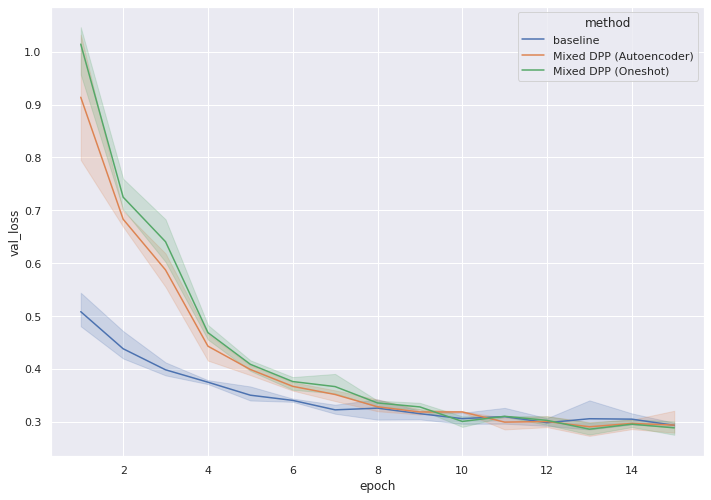

In [ ]:
import seaborn as sns 

#Plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="epoch", y= "val_loss", hue = "method", data = train_historial)

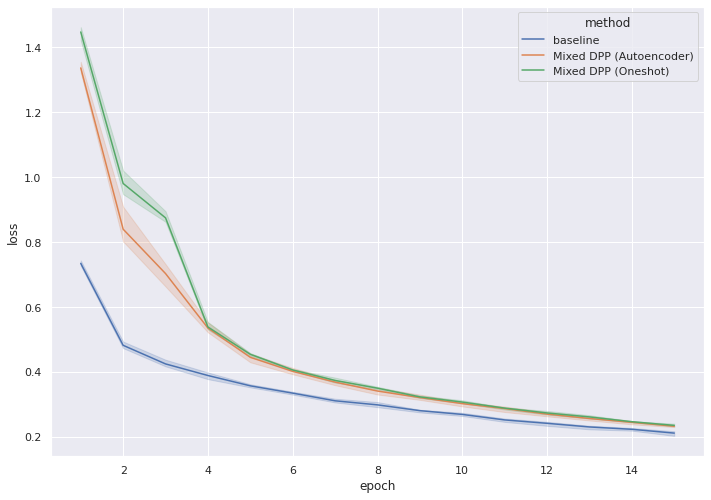

In [ ]:
#Plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="epoch", y= "loss", hue = "method", data = train_historial)

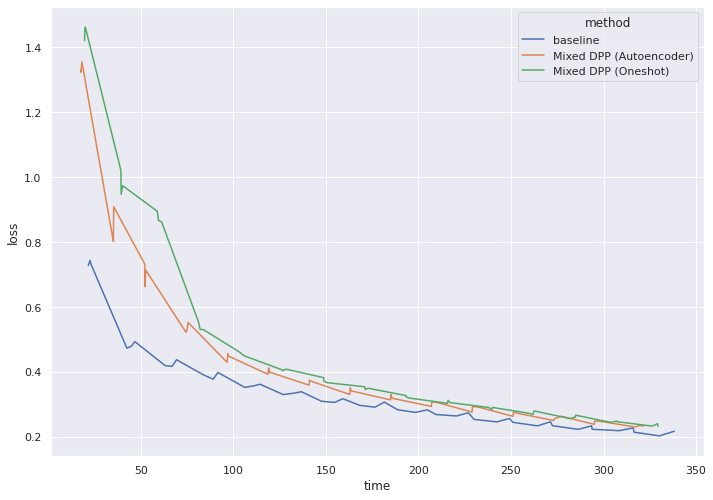

In [ ]:
#Plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="time", y= "loss", hue = "method",  data = train_historial)

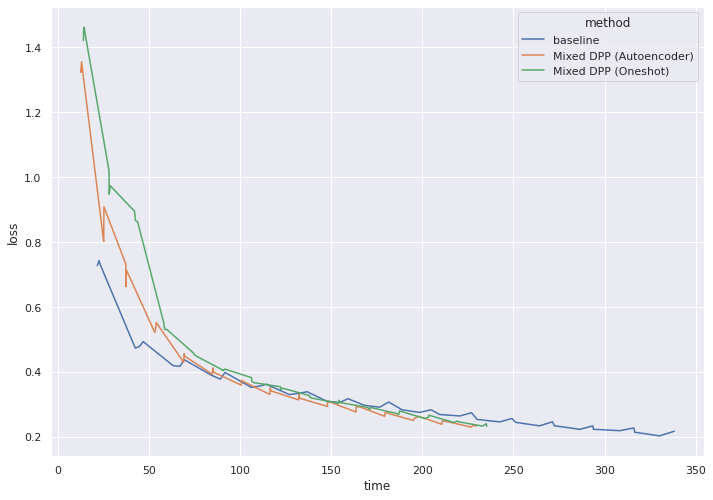

In [ ]:
#Plotting
train_historial_normalized = train_historial.copy()
train_historial_normalized.loc[train_historial_normalized.method == "Mixed DPP (Oneshot)" , "time"] = train_historial_normalized.loc[train_historial_normalized.method == "Mixed DPP (Oneshot)" , "time"] / 1.4
train_historial_normalized.loc[train_historial_normalized.method == "Mixed DPP (Autoencoder)" , "time"] = train_historial_normalized.loc[train_historial_normalized.method == "Mixed DPP (Autoencoder)" , "time"] / 1.4
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="time", y= "loss", hue = "method", data = train_historial_normalized)

In [ ]:
from IPython.display import display, clear_output

def cum_sum(time_list):
  cumtime = time_list[0]
  cumsum = [cumtime]
  for time in time_list[1:]:
    cumtime += time
    cumsum.append(cumtime)

  return cumsum

def plot_confidence(n):

  #Creating the models 
  epochs = 15
  batch_size = 64
  shape = (28,28,1)
  historial = pd.DataFrame()
  epochs_l = 5
  

  for i in range(n):
    
    print(f'Iteration: {i}')

    #####################
    #Baseline
    #####################
    
    model = CNN_deep(shape)
    #global model

    #Creating the generator
    generator_uniform = mini_batch_sampling(images = X_train, labels = y_train , batch_size = batch_size, shuffle = True)

    #Compile
    model.compile("adam", loss = ['sparse_categorical_crossentropy'] , metrics = ["accuracy"])

    #Fit
    time_callback = TimeHistory()

    history = model.fit_generator(generator_uniform, epochs=epochs, 
                        validation_data = (X_val, y_val), verbose=1, callbacks = [time_callback])

    
    history = pd.DataFrame(history.history)
    
        
    loss = history[["loss"]]
    loss["val_loss"] = history[["val_loss"]]
    loss["val_accuracy"] = history[["val_accuracy"]]
    loss["time"] =  np.array(time_callback.times).cumsum()
    loss["epoch"] = list(range(1,epochs+1))
    loss["method"] = "baseline"
    #loss["time"] = cum_sum(time_list)
    historial = pd.concat([historial , loss], axis = 0)

    clear_output(wait=True)

    #####################
    #Reversed Mixed DPP AutoEncoder
    #####################

    model = CNN_deep(shape)

    #Creating the generator
    generator_uniform = mini_batch_sampling(images = X_train, labels = y_train , batch_size = batch_size, shuffle = True)
    generator_DPP = DPP_RBF_Fast_Autoencoder(images = X_train, labels=y_train, 
                            batch_size=batch_size, N = 400, shuffle=False)

    #Compile
    model.compile("adam", loss = ['sparse_categorical_crossentropy'] , metrics = ["accuracy"])

    #Fit
    time_callback_1 = TimeHistory()
    time_callback_2 = TimeHistory()

    history_uniform = model.fit_generator(generator_uniform, epochs = epochs - epochs_l, steps_per_epoch =-1, 
                        validation_data=(X_val, y_val), verbose=1, callbacks = [time_callback_1])

    history_DPP = model.fit_generator(generator_DPP, epochs = epochs_l, steps_per_epoch =-1, 
                                  validation_data=(X_val, y_val), verbose=1, callbacks = [time_callback_2])
    
    times = time_callback_1.times + time_callback_2.times
    
    df_1 = pd.DataFrame(history_uniform.history)
    df_2 = pd.DataFrame(history_DPP.history)

    history = pd.concat([df_1 , df_2], axis = 0).reset_index(drop = True)

    loss = history[["loss"]]
    loss["val_loss"] = history[["val_loss"]]
    loss["val_accuracy"] = history[["val_accuracy"]]
    loss["epoch"] = list(range(1, epochs+1))
    loss["time"] =  np.array(times).cumsum()
    loss["method"] = "Reversed Mixed DPP (Autoencoder)"
    historial = pd.concat([historial , loss], axis = 0)

    clear_output(wait=True)

    #####################
    #Reversed Mixed DPP Oneshot
    #####################

    model = CNN_deep(shape)

    #Creating the generator
    generator_uniform = mini_batch_sampling(images = X_train, labels = y_train , batch_size = batch_size, shuffle = True)
    generator_DPP = DPP_RBF_Fast_OneShot(images = X_train, labels=y_train, 
                            batch_size=batch_size, N = 400, shuffle=False)

    #Compile
    model.compile("adam", loss = ['sparse_categorical_crossentropy'] , metrics = ["accuracy"])

    #Fit
    time_callback_1 = TimeHistory()
    time_callback_2 = TimeHistory()

    history_uniform = model.fit_generator(generator_uniform, epochs = epochs - epochs_l, steps_per_epoch =-1, 
                        validation_data=(X_val, y_val), verbose=1, callbacks = [time_callback_1])

    history_DPP = model.fit_generator(generator_DPP, epochs = epochs_l, steps_per_epoch =-1, 
                                  validation_data=(X_val, y_val), verbose=1, callbacks = [time_callback_2])
    
    times = time_callback_1.times + time_callback_2.times
    
    df_1 = pd.DataFrame(history_uniform.history)
    df_2 = pd.DataFrame(history_DPP.history)

    history = pd.concat([df_1 , df_2], axis = 0).reset_index(drop = True)

    loss = history[["loss"]]
    loss["val_loss"] = history[["val_loss"]]
    loss["val_accuracy"] = history[["val_accuracy"]]
    loss["epoch"] = list(range(1, epochs+1))
    loss["time"] =  np.array(times).cumsum()
    loss["method"] = "Reversed Mixed DPP (Oneshot)"
    historial = pd.concat([historial , loss], axis = 0)

    clear_output(wait=True)

  historial.reset_index(drop = True , inplace = True)


  return historial

train_historial = plot_confidence(n = 3)
train_historial

,loss,val_loss,val_accuracy,time,epoch,method
0,0.725346,0.529401,0.811250,24.184019,1,baseline
1,0.475540,0.411165,0.861250,46.121986,2,baseline
2,0.406320,0.384024,0.870625,68.050062,3,baseline
3,0.372916,0.366936,0.863125,90.462886,4,baseline
4,0.347831,0.325671,0.892500,113.406481,5,baseline
...,...,...,...,...,...,...
130,0.297357,0.293953,0.889375,249.702322,11,Reversed Mixed DPP (Oneshot)
131,0.261196,0.291855,0.906875,270.064255,12,Reversed Mixed DPP (Oneshot)
132,0.272674,0.291428,0.893125,290.722953,13,Reversed Mixed DPP (Oneshot)
133,0.238617,0.308008,0.893125,312.559709,14,Reversed Mixed DPP (Oneshot)


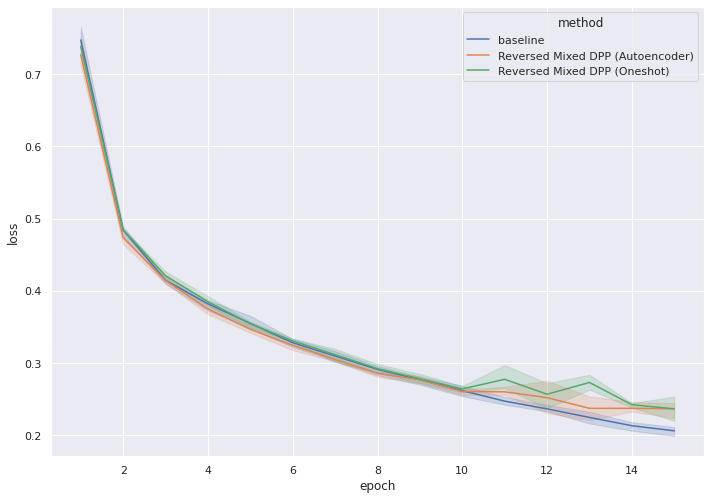

In [ ]:
#Plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="epoch", y= "loss", hue = "method", data = train_historial)

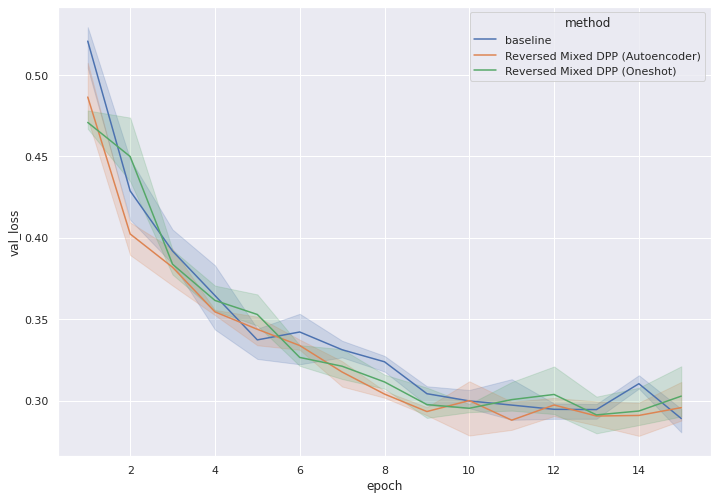

In [ ]:
import seaborn as sns 

#Plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="epoch", y= "val_loss", hue = "method", data = train_historial)

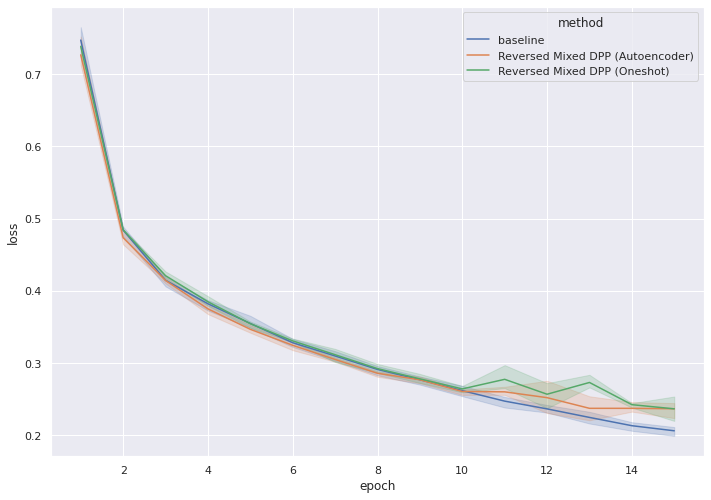

In [ ]:
#Plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="epoch", y= "loss", hue = "method", data = train_historial)

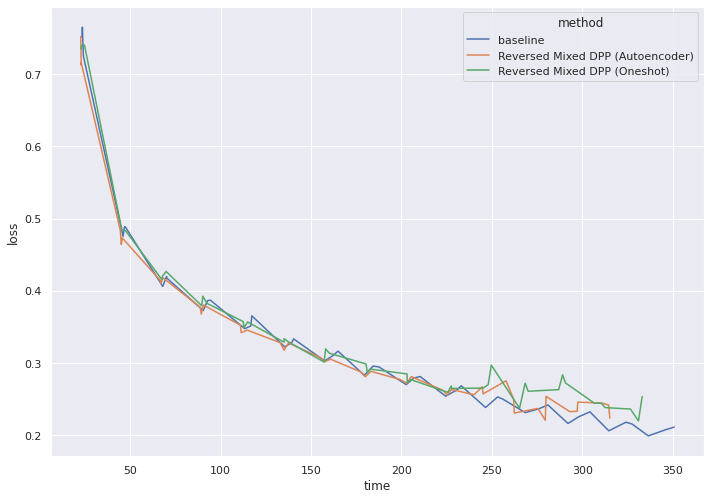

In [ ]:
#Plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="time", y= "loss", hue = "method",  data = train_historial)

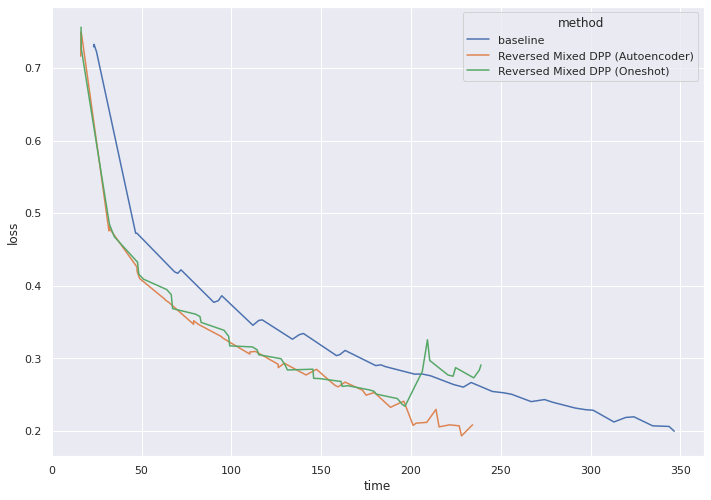

In [ ]:
#Plotting
train_historial_normalized = train_historial.copy()
train_historial_normalized.loc[train_historial_normalized.method == "Reversed Mixed DPP (Oneshot)" , "time"] = train_historial_normalized.loc[train_historial_normalized.method == "Reversed Mixed DPP (Oneshot)" , "time"] / 1.4
train_historial_normalized.loc[train_historial_normalized.method == "Reversed Mixed DPP (Autoencoder)" , "time"] = train_historial_normalized.loc[train_historial_normalized.method == "Reversed Mixed DPP (Autoencoder)" , "time"] / 1.4
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="time", y= "loss", hue = "method", data = train_historial_normalized)